Atributos do dataset:
    
    1- 'sex': sexo
    
    2- 'age': idade
    
    3- 'famsize': tamanho da família; LE3 - famílias com no máximo 3 pessoas, GT3 caso contrário
    
    4- 'Pstatus': status de habitação com os pais; T - mora junto com os pais, A - mora separado;
    
    5- 'traveltime': tempo de viagem entre escola e casa; 
        1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, or 4 - >1 hora
        
    6- 'studytime': tempo de estudo semanal; 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas
    
    7- 'schoolsup': suporte educacional extra escola
    
    8- 'famsup': suporte educacional da família
    
    9- 'paid': pagou aulas particulares por fora 
    
    10- 'activities': atividades extra-curriculares
    
    11- 'internet': acesso a internet em casa
    
    12- 'romantic': se está num relacionamento
    
    13- 'famrel': qualidade das relações familiares; 1 - muito ruim a 5 - muito boa
    
    14- 'freetime': tempo livre após escola; 1 - muito pouco até 5 - muito
    
    15- 'goout': relaciona-se com amigos; 1 - muito pouco até 5 - muito
    
    16- 'absences': quantidade de faltas na escola
    
    17- 'G3': nota média final no ensino médio
    
<br>

No dataset acima, faça uma __análise exploratória__ geral, bem como __pré-processamentos__ nas variáveis.

Considere a variável __'G3'__ como a __variável target__ do problema - contexto de __regressão.__

Teste __diferentes modelos de regressão__ a fim de explicar a variável target. Use a metodologia da __validação cruzada__ e o __coeficiente de determinação ($R^{2}$)__ como métrica de performance.

Plote __gráficos__ personalizados com os resultados.

## IMPORTANDO AS BIBLIOTECAS NECESSARIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pck

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.model_selection import cross_val_score

In [6]:
df = pd.read_csv("dataframe_exercicio_modulo_9.csv")

In [7]:
dff = df.copy()

In [8]:
dff.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,F,18,GT3,A,2,2,yes,no,no,no,no,no,4,3,4,6,6
1,F,17,GT3,T,1,2,no,yes,no,no,yes,no,5,3,3,4,6
2,F,15,LE3,T,1,2,yes,no,yes,no,yes,no,4,3,2,10,10
3,F,15,GT3,T,1,3,no,yes,yes,yes,yes,yes,3,2,2,2,15
4,F,16,GT3,T,1,2,no,yes,yes,no,no,no,4,3,2,4,10


In [9]:
dff.describe()

,age,traveltime,studytime,famrel,freetime,goout,absences,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,1.522989,1.970307,3.935824,3.201149,3.156130,4.434866,11.341954
std,1.239975,0.731727,0.834353,0.933401,1.031507,1.152575,6.210017,3.864796
min,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,1.000000,1.000000,4.000000,3.000000,2.000000,0.000000,10.000000
50%,17.000000,1.000000,2.000000,4.000000,3.000000,3.000000,2.000000,11.000000
75%,18.000000,2.000000,2.000000,5.000000,4.000000,4.000000,6.000000,14.000000
max,22.000000,4.000000,4.000000,5.000000,5.000000,5.000000,75.000000,20.000000


## O Dataset não possui valores nulos e nem valores discrepantes(Valores da Média e Mediana bem proximos)

In [10]:
dff.corr()['G3'].sort_values(ascending=False)

G3            1.000000
studytime     0.161629
famrel        0.054461
absences     -0.045671
freetime     -0.064890
goout        -0.097877
traveltime   -0.102627
age          -0.125282
Name: G3, dtype: float64

<br><br>
## Deixando as Variaveis categoricas em numericas

In [11]:
dff['internet'] = dff.internet.map({'no':0,'yes':1})
dff['sex'] = dff.sex.map({'F':0,'M':1})
dff['famsize'] = dff.famsize.map({'GT3':0,'LE3':1})
dff['Pstatus'] = dff.Pstatus.map({'A':0,'T':1})
dff['schoolsup'] = dff.schoolsup.map({'no':0,'yes':1})
dff['famsup'] = dff.famsup.map({'no':0,'yes':1})
dff['paid'] = dff.paid.map({'no':0,'yes':1})
dff['activities'] = dff.activities.map({'no':0,'yes':1})
dff['romantic'] = dff.romantic.map({'no':0,'yes':1})
dff.head()

,sex,age,famsize,Pstatus,traveltime,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,absences,G3
0,0,18,0,0,2,2,1,0,0,0,0,0,4,3,4,6,6
1,0,17,0,1,1,2,0,1,0,0,1,0,5,3,3,4,6
2,0,15,1,1,1,2,1,0,1,0,1,0,4,3,2,10,10
3,0,15,0,1,1,3,0,1,1,1,1,1,3,2,2,2,15
4,0,16,0,1,1,2,0,1,1,0,0,0,4,3,2,4,10


## Verificando Correlação

In [12]:
dff.corr()['G3'].sort_values(ascending=False)

G3            1.000000
studytime     0.161629
internet      0.107064
famsize       0.061209
famrel        0.054461
activities    0.033998
famsup        0.013313
Pstatus      -0.030693
sex          -0.031472
absences     -0.045671
paid         -0.049388
freetime     -0.064890
schoolsup    -0.079346
goout        -0.097877
romantic     -0.098363
traveltime   -0.102627
age          -0.125282
Name: G3, dtype: float64

## ANALISE EXPLORATÓRIA - BOXPLOT

<AxesSubplot:xlabel='age', ylabel='G3'>

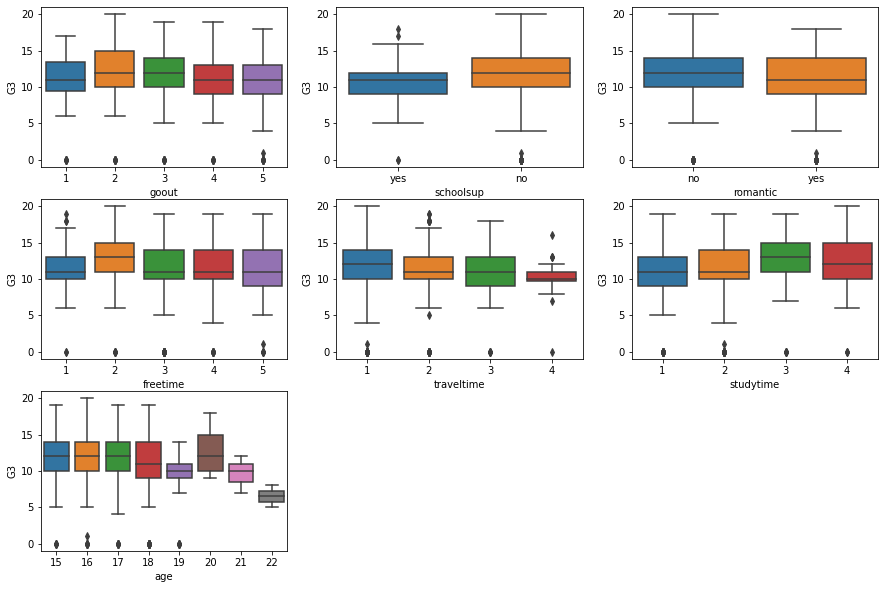

In [13]:
plt.figure(figsize=[15,10])
plt.subplot(3,3,1)
sns.boxplot(data = df, x='goout', y='G3')
plt.subplot(3,3,2)
sns.boxplot(data = df, x='schoolsup', y='G3')
plt.subplot(3,3,3)
sns.boxplot(data = df, x='romantic', y='G3')
plt.subplot(3,3,4)
sns.boxplot(data = df, x='freetime', y='G3')
plt.subplot(3,3,5)
sns.boxplot(data = df, x='traveltime', y='G3')
plt.subplot(3,3,6)
sns.boxplot(data = df, x='studytime', y='G3')
plt.subplot(3,3,7)
sns.boxplot(data = df, x='age', y='G3')

## Pode-se verificar que os graficos acima, são as variaveis que mais impactam nas notas do alunos. como tempo de estudo(studytime) e a sua idade
<br>

## Realização da Divisão do Dataset em Treino e Teste - 30%

In [14]:
def div_dataframe(df,valor,entrada):
    lista = list(entrada)
    X = df[lista].values.reshape(-1,len(lista))
    y = df['G3'].values.reshape(-1,1)
    x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=valor, random_state = 0)
    return x_treino, x_teste, y_treino, y_teste

In [15]:
x1_treino, x1_teste, y1_treino, y1_teste = div_dataframe(dff,0.30,['goout','schoolsup','romantic','freetime','traveltime','studytime','age'])

In [16]:
x2_treino, x2_teste, y2_treino, y2_teste = div_dataframe(dff,0.30,['schoolsup','romantic','studytime','age'])

In [49]:
def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

## CROSS - VALIDATION

In [17]:
def cross_validation_R2_results(modelo, nome_modelo, Xtrain, ytrain, num_folds):
    cv_results = cross_val_score(estimator = modelo, X=Xtrain, y=ytrain, cv = num_folds, scoring = 'r2') 
    modelo.fit(Xtrain, ytrain)
    r2_train = r2_score(y_true=ytrain, y_pred=modelo.predict(Xtrain))
    plt.figure(figsize=[7,5])
    plt.scatter(range(1, 1+num_folds), cv_results, c = 'blue', s = 100)
    plt.plot(range(1, 1+num_folds), cv_results, c = 'blue', lw = 2, label = 'R2 Fold')
    plt.xticks(range(1, 1+num_folds))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.plot(range(1, 1+num_folds), [cv_results.mean()] * num_folds, c = 'red', lw = 2, label = 'R2 Cross-val Médio')
    
    
    plt.plot(range(1, 1+num_folds), [cv_results.mean() + cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '+1 desv. padrão margem')
    plt.plot(range(1, 1+num_folds), [cv_results.mean() - cv_results.std()] * num_folds, '--',
             c = 'gray', lw = 2, label = '-1 desv. padrão margem')
    
    plt.plot(range(1, 1+num_folds), [r2_train] * num_folds, '--' ,c = 'black', lw = 3, label = 'R2 Treino')
    plt.legend(fontsize = 10, bbox_to_anchor = [1.4,1.])
    plt.ylim([0,1.05])
    plt.grid()
    plt.ylabel("R2 Score", fontsize = 14, fontweight = 'bold')
    plt.xlabel("Folds", fontsize = 14, fontweight = 'bold')
    plt.title(nome_modelo + " | R2 TREINO/VAL: "+ str(np.round(r2_train,2)) +" / "+ str(np.round(cv_results.mean(),2)),
              fontsize = 14, fontweight = 'bold')
    plt.show()

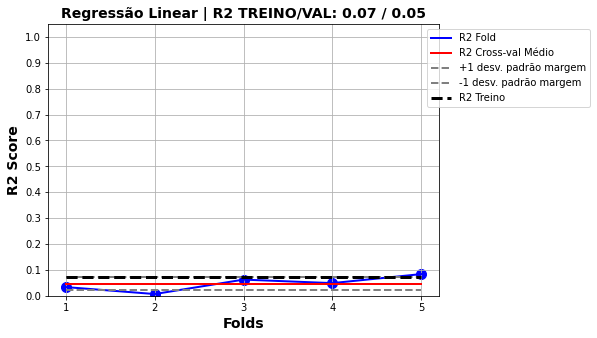

In [18]:
cross_validation_R2_results(LinearRegression(),'Regressão Linear',x1_treino,y1_treino,5)

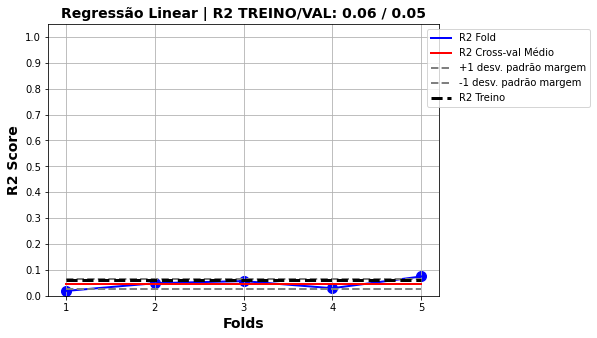

In [19]:
cross_validation_R2_results(LinearRegression(),'Regressão Linear',x2_treino,y2_treino,5)

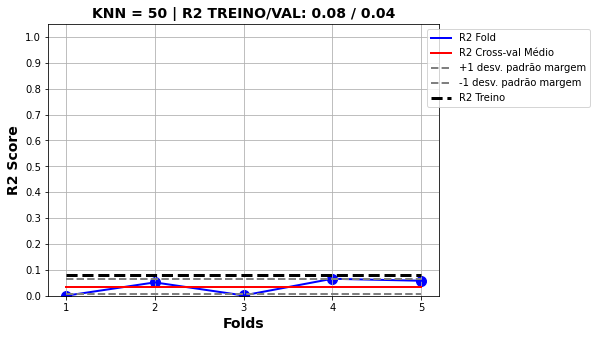

In [32]:
cross_validation_R2_results(KNeighborsRegressor(n_neighbors = 50),'KNN = 50',x1_treino,y1_treino,5)

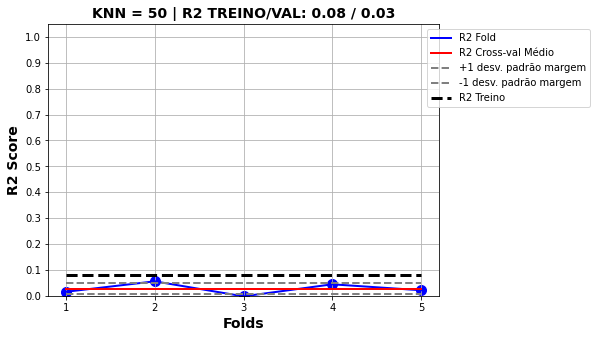

In [31]:
cross_validation_R2_results(KNeighborsRegressor(n_neighbors = 50),'KNN = 50',x2_treino,y2_treino,5)

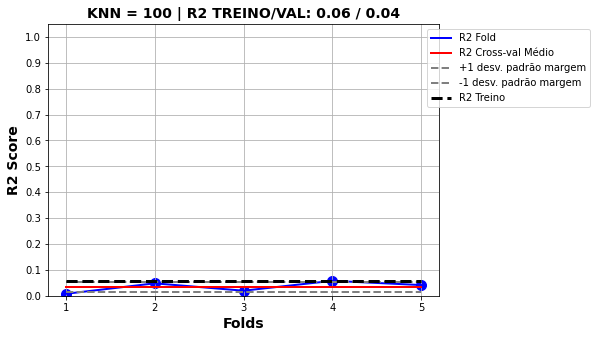

In [36]:
cross_validation_R2_results(KNeighborsRegressor(n_neighbors = 100),'KNN = 100',x1_treino,y1_treino,5)

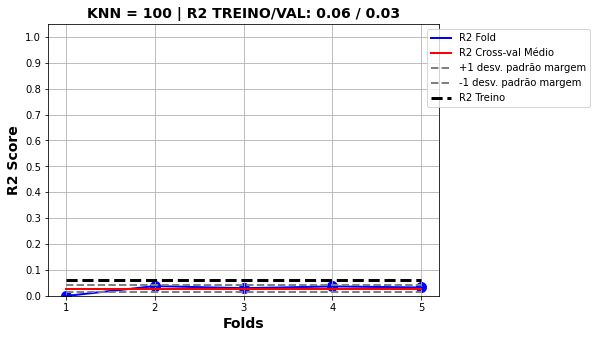

In [37]:
cross_validation_R2_results(KNeighborsRegressor(n_neighbors = 100),'KNN = 100',x2_treino,y2_treino,5)

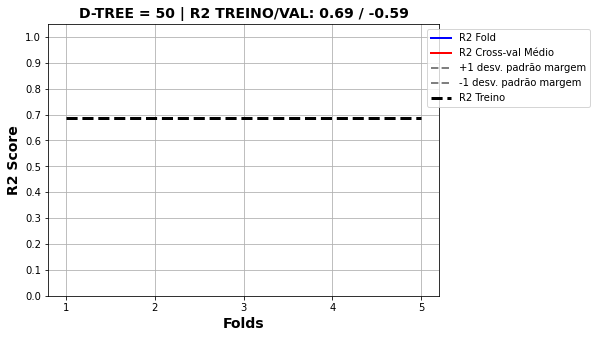

In [41]:
cross_validation_R2_results(DecisionTreeRegressor(max_depth = 50),'D-TREE = 50',x1_treino,y1_treino,5)

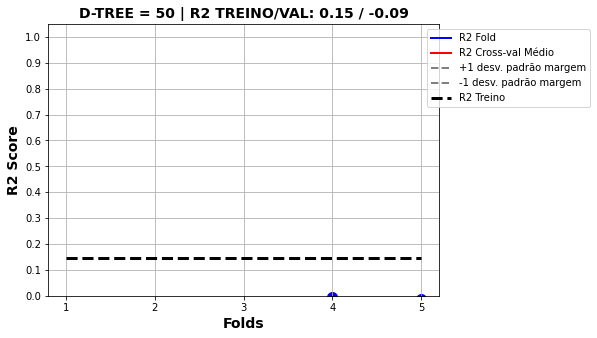

In [42]:
cross_validation_R2_results(DecisionTreeRegressor(max_depth = 50),'D-TREE = 50',x2_treino,y2_treino,5)

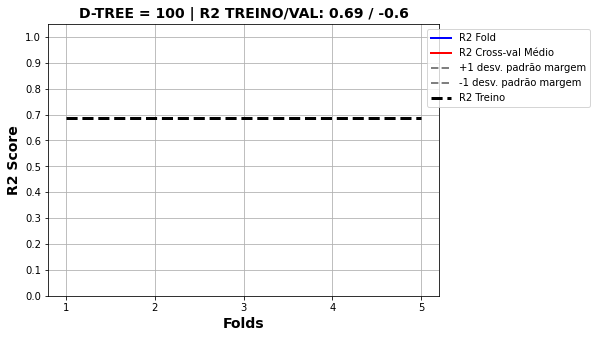

In [43]:
cross_validation_R2_results(DecisionTreeRegressor(max_depth = 100),'D-TREE = 100',x1_treino,y1_treino,5)

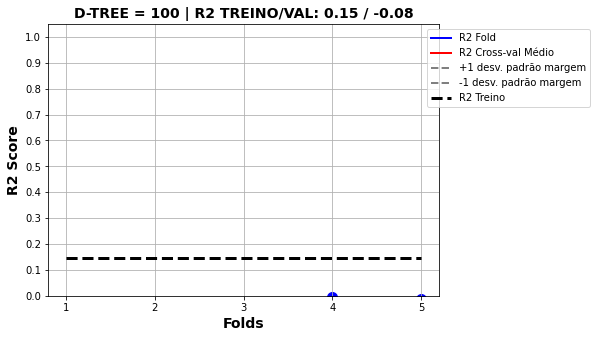

In [44]:
cross_validation_R2_results(DecisionTreeRegressor(max_depth = 100),'D-TREE = 100',x2_treino,y2_treino,5)

## Foi observado que a regressão Linear para os dados de treino x1 o melhor modelo

In [66]:
modelo_linear = LinearRegression()
modelo_linear.fit(x1_treino, y1_treino)
preds_modelo_linear = modelo_linear.predict(x1_teste)

In [67]:
r2_score(y_true = y1_teste, y_pred = preds_modelo_linear)

0.07562678833987868

In [68]:
rmse_teste_linear = RMSE(ytrue = y1_teste, ypred = preds_modelo_linear)
rmse_teste_linear

3.24360961536737

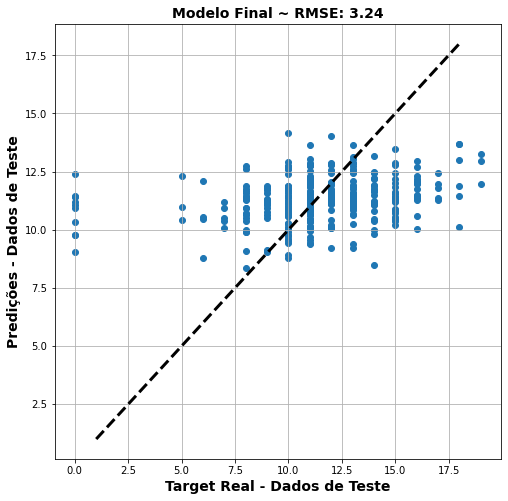

In [69]:
plt.figure(figsize=[8,8])
plt.title("Modelo Final ~ RMSE: " + str(np.round(rmse_teste_linear,2)), fontweight = 'bold', fontsize = 14)
plt.scatter(y1_teste, preds_modelo_linear)
plt.xlabel("Target Real - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.ylabel("Predições - Dados de Teste", fontweight = 'bold', fontsize = 14)
plt.grid()
range_line = int(np.maximum(max(y1_teste), max(preds_modelo_linear)))
plt.plot(range(1, range_line), range(1, range_line), '--' ,c = 'black', lw = 3)
plt.show()